### ***Decision Trees***

### *Classification*

In [14]:
#### training Tree for classification ####

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:,2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)
"Done"

'Done'

In [15]:
#### Visualizing Tree ####
from sklearn.tree import export_graphviz

dot_file = open('iris_tree.dot','w')

export_graphviz(
    tree_clf,
    out_file = dot_file,
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded = True,
    filled = True 
)

dot_file.close()

*above code will genrate a .dot file which can be converted to .png using graphviz*
<img src='https://i.ibb.co/yVC7sBb/iris-tree.png' width='40%'><br><br>
***Step Followed by our Decision Tree to do Classification***<br>
* First it ask weather the petal-length is <=2.45 if yes then if will classify it as *setosa* class as its the *leaf node* (no further branches)
* If False , it will check children node ie. if petal-width is <=1.75 if yes it will classify as *versicolor* class and *virginica* otherwise
<br><br>

***gini*** : it tells the impurity of node , or node's confidence , *lower the purer*<br>
<img src='https://www.learnbymarketing.com/wp-content/uploads/2016/02/gini-index-formula.png' width='20%'><br>
***entropy*** : it's originated from thermodynamics as it measures molecular disorder/randomness , similarly it can be used to state the purity for a node as it approches zero as the randomness (ie. more classes) reduces (0 for node with single class) . can be set with hyperparameter *criterion='entropy'* , most of the time it gini and entropy have negligle diffrence
<img src='https://buggyprogrammer.com/wp-content/uploads/2022/04/6-1.png' width='30%'><br>
***value*** : it tell that how many instances of which class belong to that node<br><br>

***Computational complexity*** : depth of a well-balanced decision tree is genereally ***O(log₂(m))*** and its computational complexity is ***O(n×mxlog₂(m))*** *(where n is number of feature and m is number of instances)*<br><br>

***Estimating Class Probability*** : We can return probability of instance to belong in certain class by *predict_proba()* function , it will first find the node/leaf where instance belong then return the ratio of training instance of class *k* in that node.<br><br>

***CART (Classification and regression tree) Algo.*** : This is the dicision maker algo. used in scikit-learn's decission_trees. The method is quite simple , it devide training data into 2 subset on bases of single feature (*k*) and a threshold (*tₖ*) , the pair(*k,tₖ*) that produces the purest subset is found by minimizing the cost-function<br>
<img src='https://miro.medium.com/max/1068/1*xC69ZSOwhO2PdG0JDRiSnw.png' width='40%'><br>
after finding the pair , it will furthur devide the subset and continue this untill reaches max-depth(user-defined) or it can't split into further pure subsets.<br><br>

***Regularizaion Hyperparamenter*** : Decission tree as a default is unconstrained , and tend to fit very closely to dataset (overfitting) . To regularize the tree we have to constrain tree's freedom , which can be done with help of various hyperparameter like definig *max-depth* which is none by default(infinite depth) , or we can use *min_sample_leaf , min_weight_fraction_leaf , min_sample_leaf , max_leaf_node , max_feature* . Increasing *min_** or redusing *max_** will regularize the tree.

### *Regression*

In [16]:
#### preparing random-quadritic dataset #####
import numpy as np
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

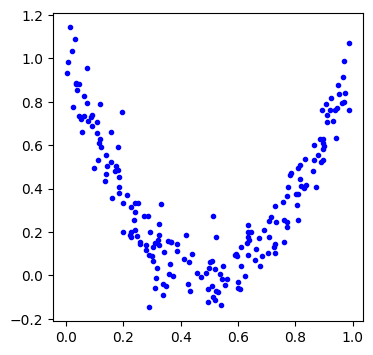

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
plt.plot(X,y,'b.')
plt.show()

In [18]:
#### training tree(regressor) ####
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg2 = DecisionTreeRegressor(max_depth=4)

tree_reg.fit(X,y)
tree_reg2.fit(X,y)

"done"

'done'

In [19]:
#### Visualizing Tree ####
from sklearn.tree import export_graphviz

dot_file = open('reg_tree.dot','w')

export_graphviz(
    tree_reg,
    out_file = dot_file,
    feature_names = ['x1'],
    rounded = True,
    filled = True 
)

dot_file.close()

*above code will genrate this image(.dot file)*
<img src='https://i.ibb.co/WzgXwst/reg-tree.png' width='55%'><br>
The logic is similar to that of regression it will check the condition (i.e. feature, threshold pair) and answer/predict accordingly .

In [23]:
def plt_decision_tree(tree,X,y): 
    axes = [0,1,-0.2,1]
    x1 = np.linspace(axes[0],axes[1],500).reshape(-1,1)
    y1 = tree.predict(x1)
    
    plt.figure(figsize=(4,3))
    plt.plot(X,y,'b.')
    plt.plot(x1,y1,'r.-')
    
    plt.show()

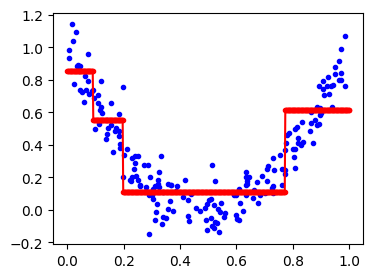

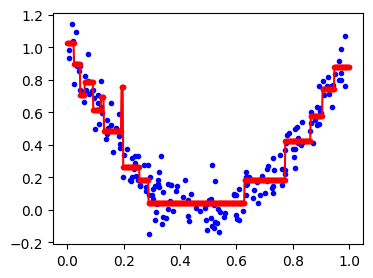

In [26]:
plt_decision_tree(tree_reg,X,y) # depth=2 | good-fitting
plt_decision_tree(tree_reg2,X,y) #depth=4 | over-fitting

##### Limitations/Instability
the main issue with decision tree is that it makes orthagonal decision boundries(all boundries are perpendicular to an axis) which make it sensitive to rotation , which can be dealed with help of ***PCA*** , more genreally its very sensitive to small variation